<a href="https://colab.research.google.com/github/vicotrbb/data_science/blob/master/projects/face-story/face_sizes_and_formats_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dlib

In [84]:
import cv2
import numpy as np
import dlib
from IPython.display import Image
from scipy.spatial import distance as dist
import math

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [7]:
!ls "/gdrive/My Drive/face-story"

face.JPG  shape_predictor_68_face_landmarks.dat


In [85]:
def calculate_eclidian_distance(x, y):
  distance = dist.euclidean(x, y) #math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)]))
  return distance

In [68]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/gdrive/My Drive/face-story/shape_predictor_68_face_landmarks.dat")
img = cv2.imread("/gdrive/My Drive/face-story/face.JPG")
gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)
faces = detector(gray)

x1, x2, y1, y2 = 0,0,0,0

for face in faces:
  x1 = face.left()
  y1 = face.top()
  x2 = face.right() 
  y2 = face.bottom()

  landmarks = predictor(image=gray, box=face) 

  for n in range(0, 68):
    x = landmarks.part(n).x
    y = landmarks.part(n).y       
    cv2.circle(img=img, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)

    if n == 1:
      x1 = x
      y1 = y
    
    if n == 15:
      x2 = x
      y2 = y

cv2.imwrite('out.png', img)
shape = img.shape

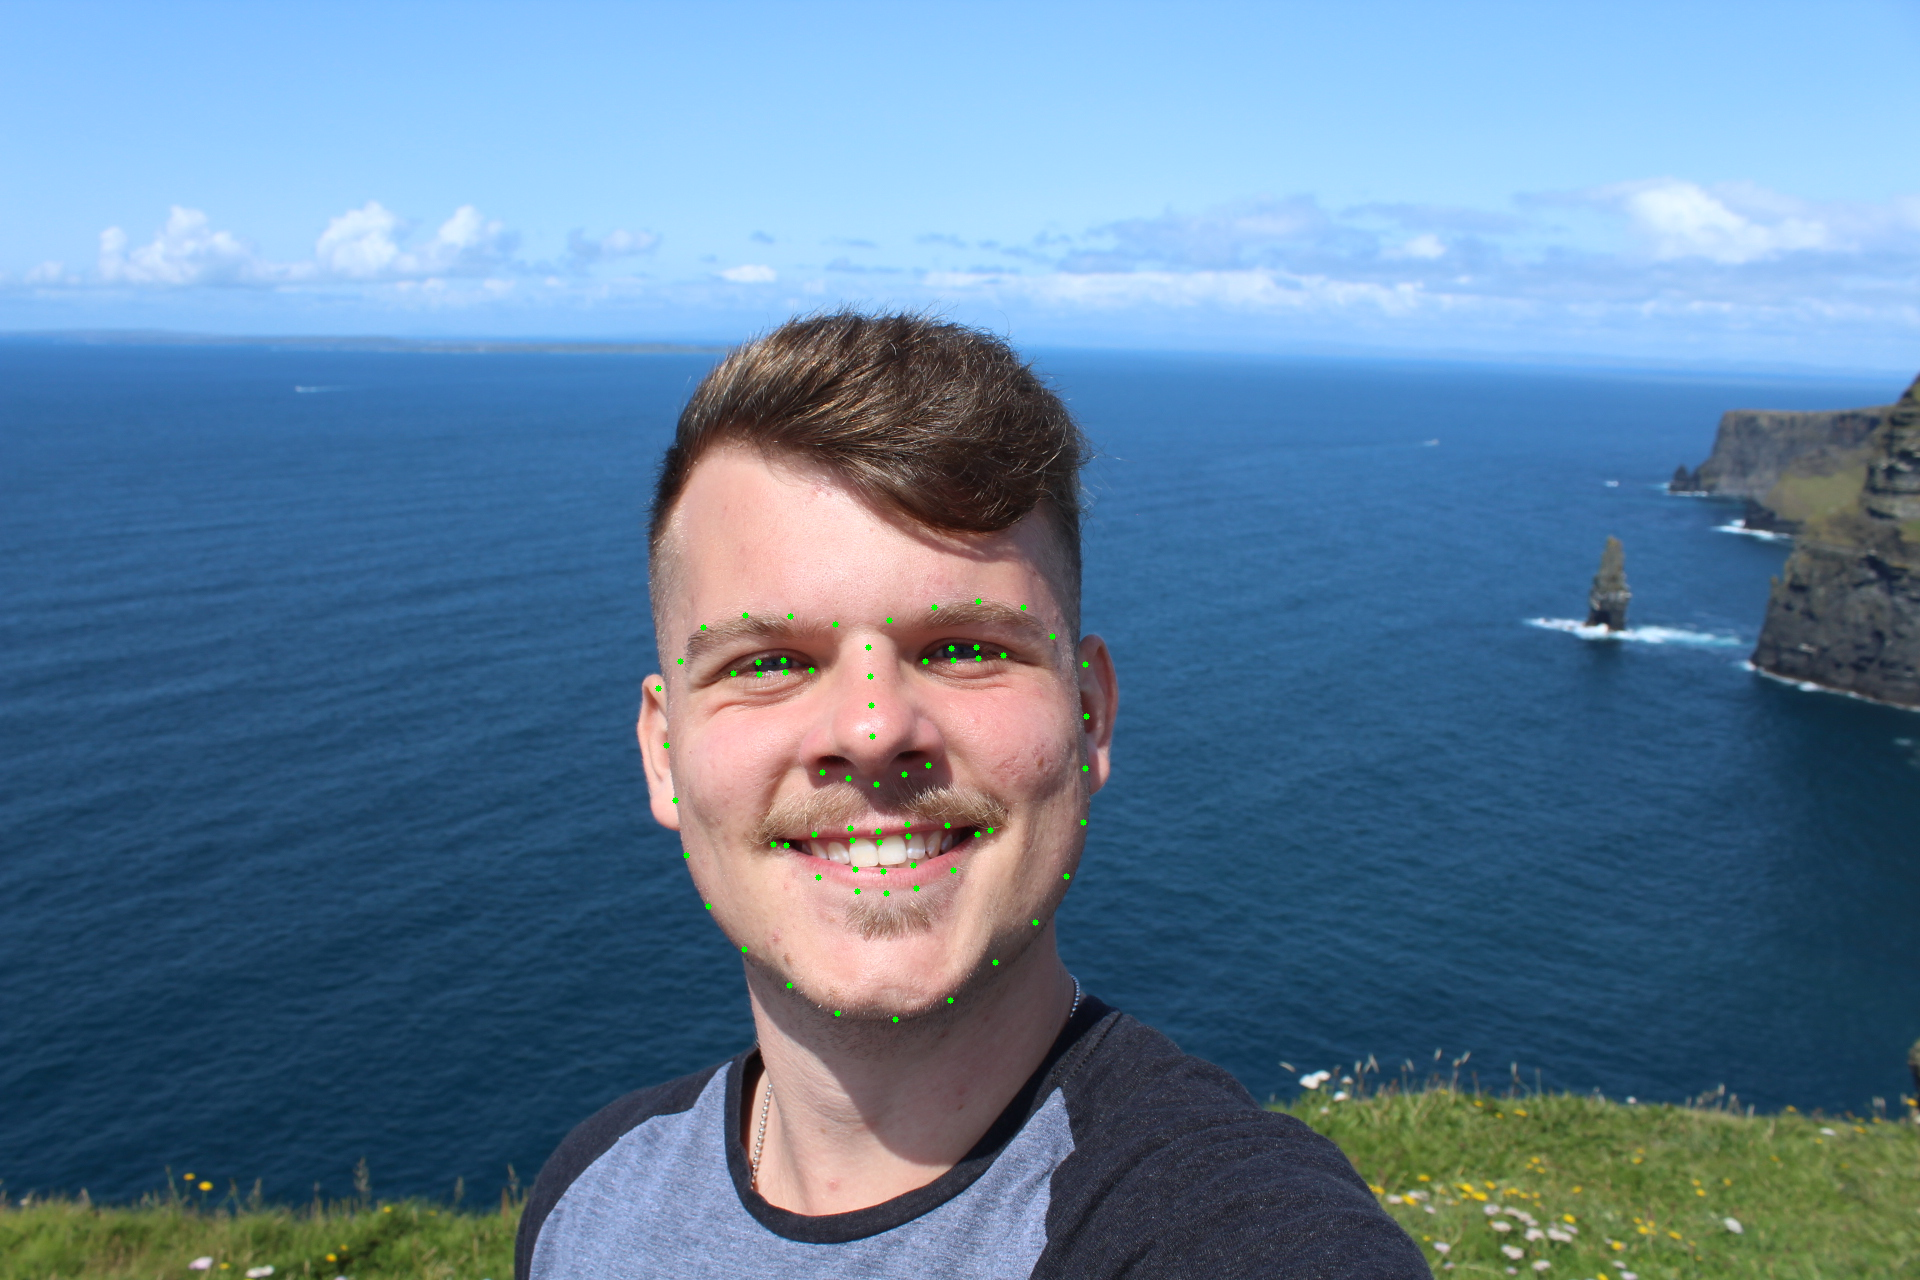

In [65]:
Image('out.png')

In [70]:
print('altura da imagem: ', shape[0])
print('largura da imagem: ', shape[1])
print('camadas RGB da imagem: ', shape[2])

altura da imagem:  1280
largura da imagem:  1920
camadas RGB da imagem:  3


In [77]:
img_heigth = (shape[0] / 90) * 2.54 # altura em cm
img_width = (shape[1] / 90) * 2.54 # largura em cm

print('altura em cm: ', img_heigth)
print('largura em cm: ', img_width)

altura em cm:  36.12444444444444
largura em cm:  54.18666666666667


228.6

In [59]:
t1 = (x1, x2)
t2 = (y1, y2)

In [81]:
t1, t2

((666, 1086), (745, 716))

In [88]:
euclidian_dist = calculate_eclidian_distance(t1, t2)

In [93]:
euclidian_dist / 1920

1920.0